<a href="https://colab.research.google.com/github/dzulwulann/Hotel_performance/blob/main/Investigate_Hotel_Bussines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Relevant Library

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data set

In [ ]:
#import file data
hotel_bookings = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Investigate Hotel Bussines/hotel_bookings_data.csv')

In [ ]:
#Getting brief information from dataset
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#getting contains data set
hotel_bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,No Deposit,303.0,NaN,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,No Deposit,240.0,NaN,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,No Deposit,15.0,NaN,0,Personal,105.5,0,0,Canceled


What do we get from brief data set info?



*  We have 119390 rows of data
*  Dataset contains 29 columns/features
* There are missing value in some columns/features such as **children**,**city**, **agent**, and **company**
* Datatype for features **children** convert from float to int.
* The rest of columns have correct datatype, however, it needs to be converted for analysis inquiry  
* All values are related to each column




In [ ]:
hotel_bookings.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_weekdays_nights          False
adults                            False
children                           True
babies                            False
meal                              False
city                               True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False


## Handling Missing Value

In [ ]:
#replacing null value for feature children
hotel_bookings['children'] = hotel_bookings['children'].fillna(hotel_bookings['children'].median())


In [ ]:
#replacing null value for city
hotel_bookings['city'] = hotel_bookings['city'].fillna(hotel_bookings['city'].mode().iloc[0])

In [ ]:
#replacing null value for agent
hotel_bookings['agent'] = hotel_bookings['agent'].fillna(hotel_bookings['agent'].mode().iloc[0])

In [ ]:
#replacing null value for company
hotel_bookings['company'] = hotel_bookings['company'].fillna(hotel_bookings['company'].mode().iloc[0])

In [ ]:
#Checking is there any null value
hotel_bookings.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_weekdays_nights          False
adults                            False
children                          False
babies                            False
meal                              False
city                              False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False
days_in_waiting_list              False
customer_type                     False


In [ ]:
hotel_bookings['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [ ]:
hotel_bookings['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

In [ ]:
#Replacing 'undefined' value to 'No Meal'
hotel_bookings['meal'] = hotel_bookings['meal'].replace(['Undefined'], 'No Meal')


In [ ]:
hotel_bookings['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: count, dtype: int64

In [ ]:
#filtering data with numbers of adults > 0
hotel_bookings = hotel_bookings[hotel_bookings['adults']!= 0]

In [ ]:
# Group by hotel, year, and month and count bookings
booking_counts = hotel_bookings.groupby(['hotel', 'arrival_date_month','arrival_date_year']).size().reset_index(name='booking_count')
booking_counts.columns = ['hotel', 'month', 'year', 'booking_count']

print(booking_counts)

           hotel      month  year  booking_count
0     City Hotel      April  2018           2352
1     City Hotel      April  2019           2580
2     City Hotel     August  2018           3913
3     City Hotel     August  2019           3960
4     City Hotel   December  2017           3380
5     City Hotel   December  2018           4198
6     City Hotel   February  2017           1640
7     City Hotel   February  2018           2451
8     City Hotel    January  2017           1233
9     City Hotel    January  2018           3097
10    City Hotel       July  2018           3665
11    City Hotel       July  2019           4540
12    City Hotel       June  2018           3550
13    City Hotel       June  2019           3898
14    City Hotel      March  2018           1354
15    City Hotel      March  2019           2358
16    City Hotel        May  2018           3031
17    City Hotel        May  2019           3386
18    City Hotel   November  2017           3524
19    City Hotel   N

In [ ]:
#add new column date to concate month and year
booking_counts['date'] = pd.to_datetime(booking_counts['year'].astype(str) + '-' + booking_counts['month'], format='%Y-%B')

In [ ]:
#sort booking count by date
booking_sorted= booking_counts.sort_values(by='date')

In [ ]:
booking_sorted

,hotel,month,year,booking_count,date
34,Resort Hotel,January,2017,1104,2017-01-01
8,City Hotel,January,2017,1233,2017-01-01
32,Resort Hotel,February,2017,1264,2017-02-01
6,City Hotel,February,2017,1640,2017-02-01
23,City Hotel,September,2017,1396,2017-09-01
49,Resort Hotel,September,2017,1378,2017-09-01
46,Resort Hotel,October,2017,1409,2017-10-01
20,City Hotel,October,2017,2470,2017-10-01
18,City Hotel,November,2017,3524,2017-11-01
44,Resort Hotel,November,2017,1585,2017-11-01


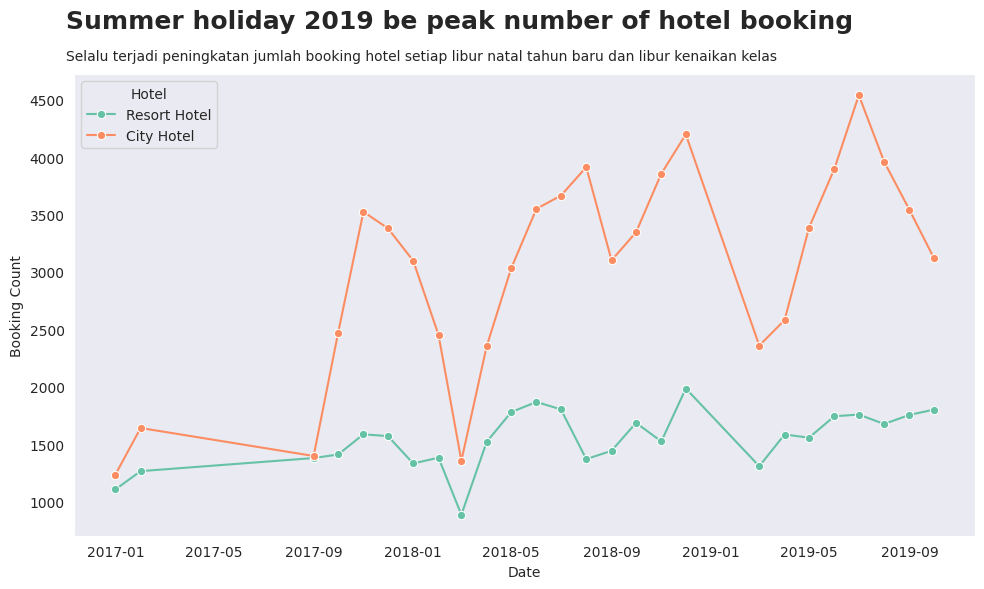

In [ ]:
# from matplotlib.patches import Rectangle

# Plotting with seaborn
sns.set_style("dark")
plt.figure(figsize=(10, 6))
 # Set style to one with no grid lines
sns.lineplot(data=booking_sorted, x='date', y='booking_count', hue='hotel', marker='o',palette='Set2')

plt.text(-0.009, 1.1, 'Summer holiday 2019 be peak number of hotel booking', transform=plt.gca().transAxes, ha='left', fontsize=18, fontweight='bold')
plt.text(-0.009, 1.03, 'Selalu terjadi peningkatan jumlah booking hotel setiap libur natal tahun baru dan libur kenaikan kelas', transform=plt.gca().transAxes, ha='left', fontsize=10)

plt.xlabel('Date')
plt.ylabel('Booking Count')
plt.legend(title='Hotel')

# highlight_start = pd.to_datetime('2019-05')
# highlight_end = pd.to_datetime('2019-09')
# highlight_width = highlight_end - highlight_start
# highlight = Rectangle((highlight_start, 0), highlight_width, 300, color='red', alpha=0.3, zorder=10)  # Increased z-order
# plt.gca().add_patch(highlight)

plt.tight_layout()
plt.show()


In [ ]:
hotel_bookings['stay_duration'] = hotel_bookings['stays_in_weekend_nights'] + hotel_bookings['stays_in_weekdays_nights']

In [ ]:
descriptive_stats = hotel_bookings['stay_duration'].describe()
print(descriptive_stats)

count    118987.000000
mean          3.425996
std           2.541708
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64


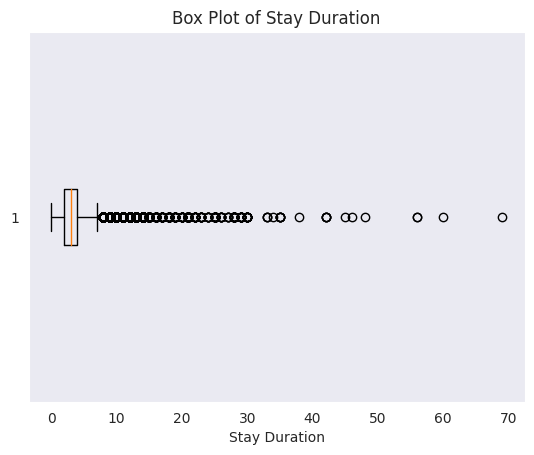

In [ ]:
#Plot the distribution of the long stay duration
plt.boxplot(hotel_bookings['stay_duration'], vert=False)
plt.xlabel('Stay Duration')
plt.title('Box Plot of Stay Duration')
plt.show()

Grouping long stay duration to be 3 group
*  0 - 3 days short term stay
* 4 - 10 days middle term stay
* more than 10 days long termn stay

In [ ]:
conditions = [
    hotel_bookings['stay_duration'] > 10,
    (hotel_bookings['stay_duration'] <= 10) & (hotel_bookings['stay_duration'] >= 4),
    hotel_bookings['stay_duration'] <= 3
]

# Define the corresponding labels for each group
labels = ['Long term stay', 'Middle term stay', 'Short term stay']

In [ ]:
# Create the duration_group column using np.select
hotel_bookings['duration_group'] = np.select(conditions, labels, default='Other')

In [ ]:
hotel_bookings['duration_group'].value_counts()

duration_group
Short term stay     76229
Middle term stay    40665
Long term stay       2093
Name: count, dtype: int64

In [ ]:
cancel_agg = hotel_bookings.groupby(['hotel','duration_group','is_canceled']).size().reset_index(name='canceled_count')
cancel_agg.columns = ['hotel','duration','is_canceled','canceled_count']

cancel_agg

,hotel,duration,is_canceled,canceled_count
0,City Hotel,Long term stay,0,140
1,City Hotel,Long term stay,1,289
2,City Hotel,Middle term stay,0,13609
3,City Hotel,Middle term stay,1,8711
4,City Hotel,Short term stay,0,32196
5,City Hotel,Short term stay,1,23995
6,Resort Hotel,Long term stay,0,1186
7,Resort Hotel,Long term stay,1,478
8,Resort Hotel,Middle term stay,0,12475
9,Resort Hotel,Middle term stay,1,5870


In [ ]:
city_hotel = cancel_agg[cancel_agg['hotel']=='City Hotel']
city_hotel.drop(columns='hotel')

,duration,is_canceled,canceled_count
0,Long term stay,0,140
1,Long term stay,1,289
2,Middle term stay,0,13609
3,Middle term stay,1,8711
4,Short term stay,0,32196
5,Short term stay,1,23995


In [ ]:
grouped_data = city_hotel.pivot(index='duration', columns='is_canceled', values='canceled_count')
grouped_data.columns = ['Not Canceled', 'Canceled']
grouped_data

,Not Canceled,Canceled
duration,,
Long term stay,140,289
Middle term stay,13609,8711
Short term stay,32196,23995


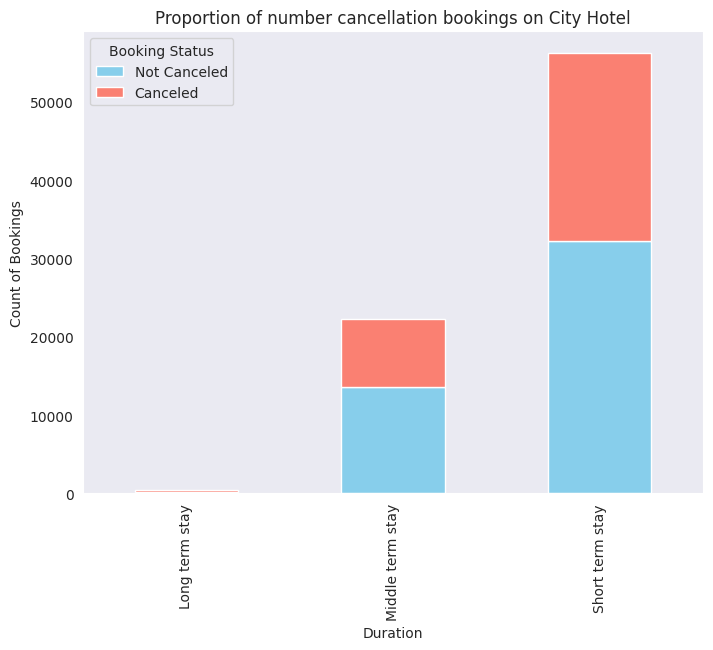

In [ ]:
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Proportion of number cancellation bookings on City Hotel')
plt.xlabel('Duration', rotation=0)
plt.ylabel('Count of Bookings')
plt.legend(title='Booking Status')
plt.show()

In [ ]:
Resort_hotel = cancel_agg[cancel_agg['hotel']=='Resort Hotel']
Resort_hotel.drop(columns='hotel')

,duration,is_canceled,canceled_count
6,Long term stay,0,1186
7,Long term stay,1,478
8,Middle term stay,0,12475
9,Middle term stay,1,5870
10,Short term stay,0,15266
11,Short term stay,1,4772


In [ ]:
grouped_data_resort = Resort_hotel.pivot(index='duration', columns='is_canceled', values='canceled_count')
grouped_data_resort.columns = ['Not Canceled', 'Canceled']
grouped_data_resort

,Not Canceled,Canceled
duration,,
Long term stay,1186,478
Middle term stay,12475,5870
Short term stay,15266,4772


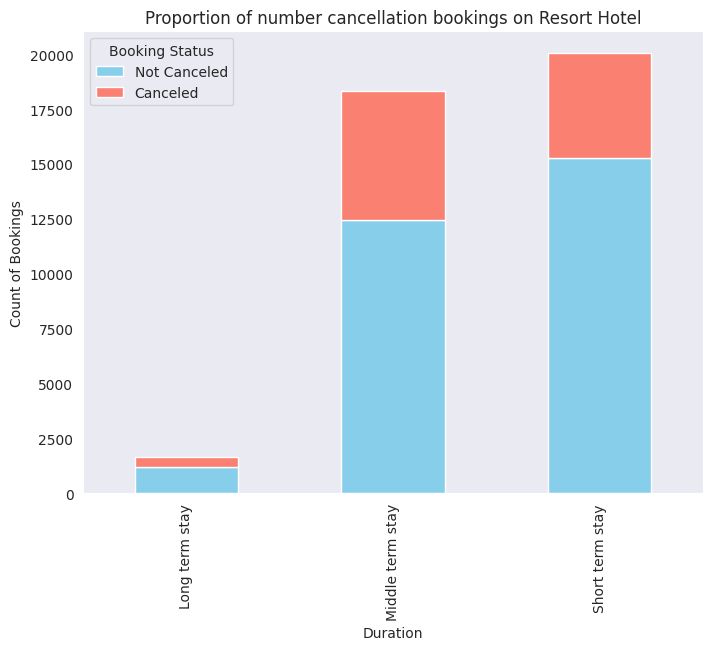

In [ ]:
plt.figure(figsize=(8, 6))
grouped_data_resort.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Proportion of number cancellation bookings on Resort Hotel')
plt.xlabel('Duration', rotation=0)
plt.ylabel('Count of Bookings')
plt.legend(title='Booking Status')
plt.show()

In [ ]:
#grouping lead time into categogiries
conditions_lead_time = [
    (hotel_bookings['lead_time'] <= 7),
    (hotel_bookings['lead_time'] > 7) & (hotel_bookings['lead_time'] <= 14),
    (hotel_bookings['lead_time'] > 14) & (hotel_bookings['lead_time'] <= 21),
    (hotel_bookings['lead_time'] > 21) & (hotel_bookings['lead_time'] <= 30),
    (hotel_bookings['lead_time'] > 30)
]

# Define the corresponding labels for each group
labels = ['0-7 days','7-14 days', '14-21 days', '21-30 days', 'more than 30 days']

In [ ]:
#make new column to labeling the categories
hotel_bookings['lead_time_interval'] = np.select(conditions_lead_time, labels, default='Unknown')

In [ ]:
hotel_bookings['lead_time_interval'].value_counts()

lead_time_interval
more than 30 days    80452
0-7 days             19617
7-14 days             7006
21-30 days            6170
14-21 days            5742
Name: count, dtype: int64

In [ ]:
lead_time_group = hotel_bookings.groupby(['hotel','lead_time_interval','is_canceled']).size().unstack(level = 2)
lead_time_group['canceled_prob'] = lead_time_group[1] / (lead_time_group[0] + lead_time_group[1])
lead_time_group

is_canceled                          0      1  canceled_prob
hotel        lead_time_interval                             
City Hotel   0-7 days             9383   1302       0.121853
             14-21 days           2698   1208       0.309268
             21-30 days           2530   1534       0.377461
             7-14 days            3417   1127       0.248019
             more than 30 days   27917  27824       0.499166
Resort Hotel 0-7 days             8351    581       0.065047
             14-21 days           1395    441       0.240196
             21-30 days           1557    549       0.260684
             7-14 days            2049    413       0.167750
             more than 30 days   15575   9136       0.369714

In [ ]:
lead_time_group['lead_time_interval']

KeyError: 'lead_time_interval'

In [ ]:
interval_order = ['0-7 days', '7-14 days', '14-21 days', '21-30 days', 'more than 30 days']
lead_time_group['lead_time_interval'] = pd.Categorical(lead_time_group['lead_time_interval'], categories=interval_order, ordered=True)
lead_time_group = lead_time_group.sort_values(by='lead_time_interval')

KeyError: 'lead_time_interval'

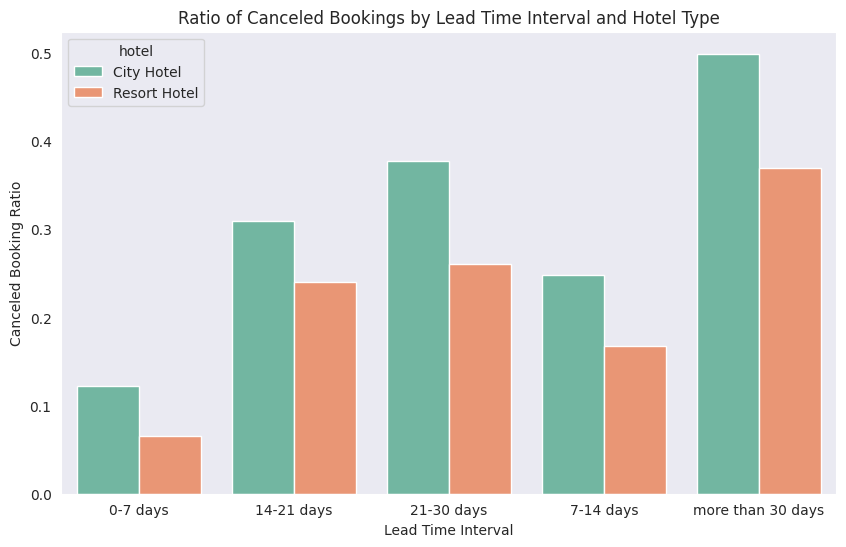

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='lead_time_interval', y='canceled_prob', hue='hotel', data=lead_time_group, palette='Set2')
plt.title('Ratio of Canceled Bookings by Lead Time Interval and Hotel Type')
plt.xlabel('Lead Time Interval')
plt.ylabel('Canceled Booking Ratio')
plt.show()